In [89]:
## Execution on single file

## packages

import os
import time
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D,CuDNNLSTM,GRU
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
from gensim.models import word2vec as glove_model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


## Indiviual file preprocessing

df=pd.read_csv("/Users/shravan/Desktop/Thesis_final/Code/Dataset/titanium.csv",encoding='latin-1')
def preprocess(sentence):
        sentence=str(sentence)
        sentence = sentence.lower()
        sentence=sentence.replace('{html}',"") #we removing the <html> tags
        cleanr = re.compile('<.*?>') # Remove anything between <>
        cleantext = re.sub(cleanr, '', sentence) # 
        rem_url=re.sub(r'http\S+', '',cleantext) #removing the URl
        rem_num = re.sub('[0-9]+', '', rem_url) # removing the digits
        tokenizer = RegexpTokenizer(r'\w+') #converting the words only to tokens
        tokens = tokenizer.tokenize(rem_num)  
        filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] 
        return " ".join(filtered_words)
    
    #stemmer and lemmatizer is not used as it is sequence to sequence model, and as we are using the word vectors it doesnt matter

df['mergeText']=df['title'] .map(str)+str(" ")+df['description']
df['cleanText']=df['mergeText'].map(lambda s:preprocess(s)) 

In [90]:
print(df['mergeText'][0])   #before preprocessing

Android: While debugger is running, cannot back out and go back into an app If you debug an Android app, you can't back out of that app and go back into it.  It hangs then at the splash screen, and shows both "Bad Socket" and "Connection Refused" errors in logcat.    Logcat:    [https://gist.github.com/43b1285ca8743eaaf672]    Screencast:    [http://screencast.com/t/m0C2c9Ojxo]  


In [91]:
print(df['cleanText'][0]) #After preprocessing

android debugger running cannot back back app debug android app back app back hangs splash screen shows bad socket connection refused errors logcat logcat screencast


In [92]:


import numpy as np
def loadGloveModel(gloveFile,i):
    print ("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([val for val in splitLine[1:]])
        model[word] = embedding
        if len(model)==100000: #loading only 100000 words , because of the constraints with the ram and time spent
            break
    print ("Done. words loaded!")
    print('word : ',i)
    print('len of the vector',len(model[i]))
    return model[i]

# calling the function with the word : android

loadGloveModel('/Users/shravan/Desktop/Thesis_final/Code/glove.840B.300d.txt','android')

Loading Glove Model
Done. words loaded!
word :  android
len of the vector 300


array(['-0.23743', '-0.29257', '0.15377', '0.77249', '0.010905',
       '0.079027', '0.69377', '-0.22317', '0.64498', '-0.14812',
       '-0.43561', '-0.50568', '-0.27966', '0.14338', '-0.12513',
       '-0.18359', '-0.55844', '1.2105', '0.090157', '-0.12987',
       '-0.29118', '0.29761', '0.09248', '-0.22891', '-0.42215',
       '0.19436', '0.079696', '-0.18053', '0.59556', '0.57981', '0.41337',
       '-0.63258', '-0.0094914', '0.41927', '0.044773', '-0.19063',
       '-0.44666', '0.22189', '-0.35559', '-0.32318', '0.070914',
       '-0.75177', '0.096137', '0.14165', '-0.38868', '0.53115',
       '-0.40099', '0.008845', '-0.6739', '-0.31581', '-0.17985',
       '-0.75444', '-0.63824', '-0.94106', '-0.10357', '0.13271',
       '-0.31798', '-0.075458', '-0.24898', '-0.088029', '-0.17372',
       '-0.15017', '0.56489', '-0.19696', '0.35566', '-0.69536',
       '0.088325', '-0.18248', '-0.1494', '-0.38777', '-0.24951',
       '0.39125', '0.13484', '-0.062459', '0.63767', '-0.11435',
   

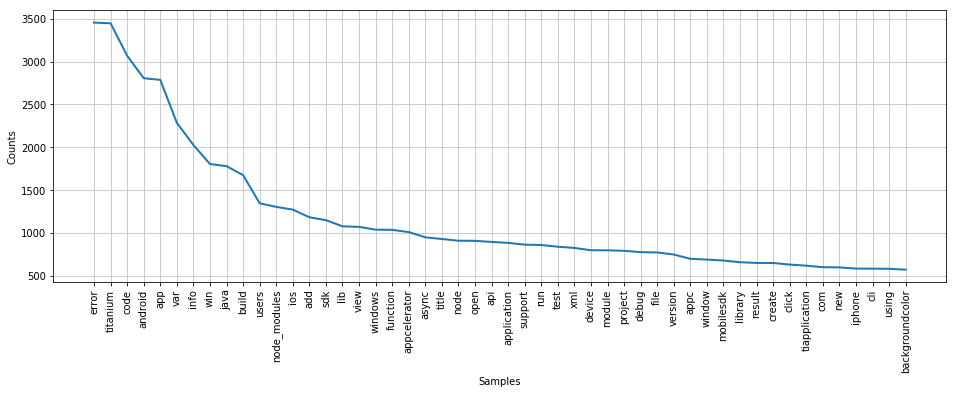

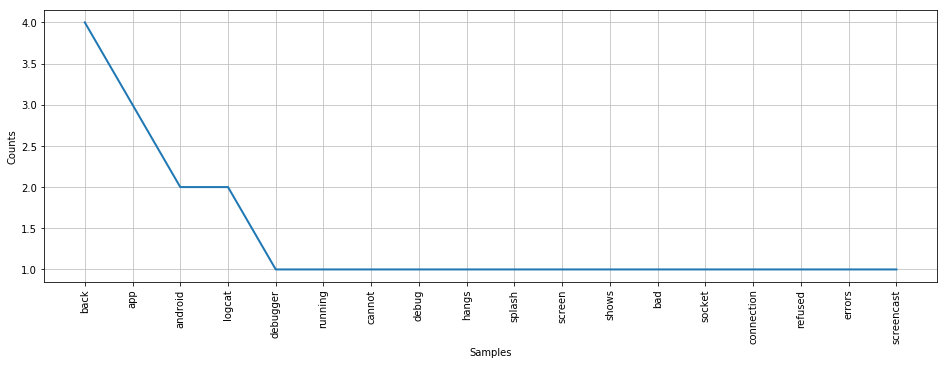

In [111]:
#frequency of words sample from the titanium

string=""

for i in df['cleanText']:
        string= ("".join(i)) + string

freqdist = nltk.FreqDist(string.split())
plt.figure(figsize=(16,5))
freqdist.plot(50)




#frequency of words from first row in the dataset

string=""

for i in df['cleanText'][0]:
        string=string + ("".join(i))

freqdist = nltk.FreqDist(string.split())
plt.figure(figsize=(16,5))
freqdist.plot(50)



In [94]:
# creating the list of word for generating the tsne graph to check the wordvectors simialrity
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['cleanText']:
        for sentence in df[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(df)

In [95]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [96]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file='/Users/shravan/Desktop/Thesis_final/Code/glove.840B.300d.txt', word2vec_output_file="gensim_glove_vectors.txt")

(2196018, 300)

In [97]:
from gensim.models import word2vec as glove_model
#from gensim.models.keyedvectors import KeyedVectors
#glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [98]:
model = glove_model.Word2Vec(corpus, size=200, window=20, min_count=80, workers=4)

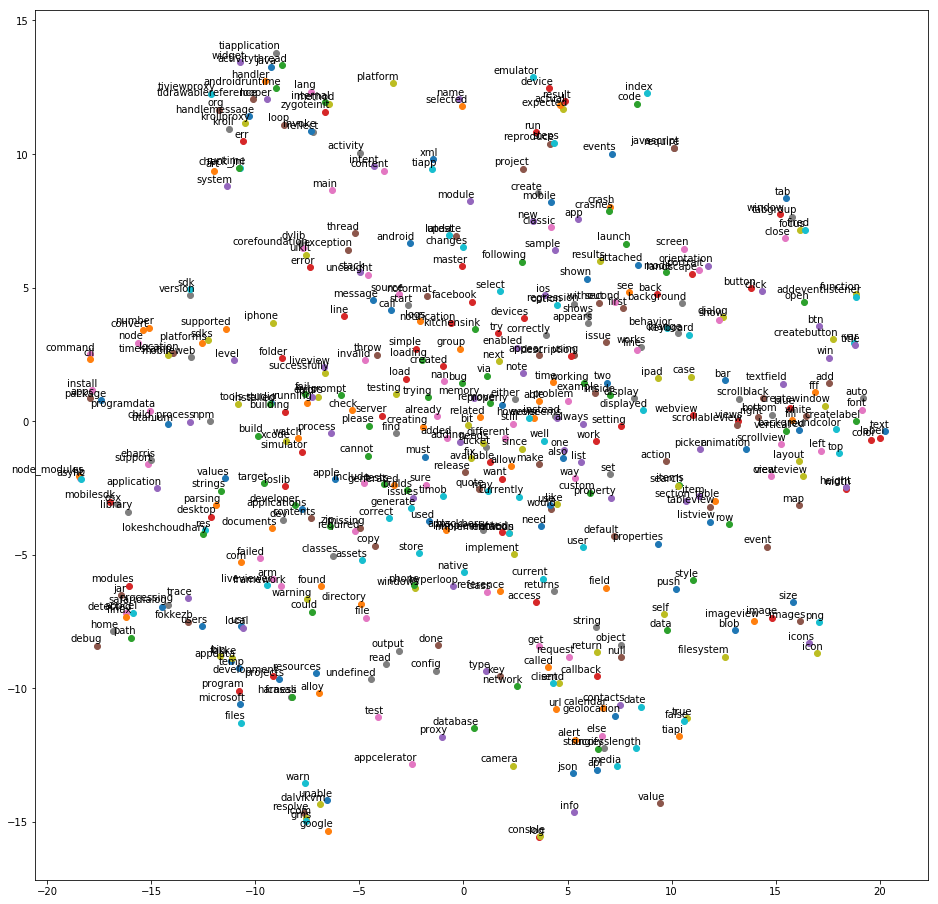

In [99]:
tsne_plot(model)

In [100]:
mae_glove_dense_2=[]
mae_glove_dense_4=[]
mae_glove_dense_8=[]
mae_glove_dense_16=[]
mae_glove_dense_32=[]
mae_glove_dense_64=[]

In [101]:
  
    ##Regression for Titanium CSV file
    
    train_df, val_df = train_test_split(df, test_size=0.3, random_state=2018)
    
    ## some config values 
    embed_size = 300 # how big is each word vector
    max_features = 1000 # how many unique words to use (i.e num rows in embedding vector)
    maxlen = 100 # max number of words in a question to use

    ## fill up the missing values
    train_X = train_df["cleanText"].fillna("_na_").values
    val_X = val_df["cleanText"].fillna("_na_").values


    ## Tokenize the sentences
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))
    train_X = tokenizer.texts_to_sequences(train_X)
    val_X = tokenizer.texts_to_sequences(val_X)

    ## Pad the sentences 
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = pad_sequences(val_X, maxlen=maxlen)
    

    ## Get the target values
    train_y = train_df['storypoint'].values
    val_y = val_df['storypoint'].values
    
    #Load glove embedding file
    EMBEDDING_FILE = '/Users/shravan/Desktop/Thesis_final/Code/glove.840B.300d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]


    word_index = tokenizer.word_index
    nb_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: embedding_matrix[i] = embedding_vector
    
    print("Tintanium" ,': embedding done')
    
   
    dense=[2,4,8,16,32,64]
    
    #with glove embedding method
    for i in dense:
        inp = Input(shape=(maxlen,))
        x = Embedding(max_features, embed_size)(inp)
        x = Bidirectional(GRU(64, return_sequences=True))(x) #64 GRU Units
        x = GlobalMaxPool1D()(x)
        x = Dense(i, activation="relu")(x) #relu : 
        x = Dropout(0.1)(x)
        x = Dense(1, activation="relu")(x)
        model = Model(inputs=inp, outputs=x)
        model.compile(loss='mse', optimizer='adam') #as we are regression so the mse and adam : 
        
        #epoches : 10 times it traverses ,
        #batch : 128 rows one complete journey
        import random
        random.seed(1317)
        model.fit(train_X, train_y, batch_size=128, epochs=10, validation_data=(val_X, val_y),verbose=False)
        print('training done : dense_layer={}'.format(i))
        y_pred = model.predict(pd.DataFrame(val_X))# predicting model on test data and store 
        print('prediction done : dense_layer={}'.format(i))
        if i==2: 
            mae_glove_dense_2.append(mean_absolute_error(val_y,y_pred))
            #mae=mae.append({'dense-2':mean_absolute_error(val_y,y_pred)},ignore_index=True) 
        elif i==4:
            mae_glove_dense_4.append(mean_absolute_error(val_y,y_pred))
            #mae=mae.append({'dense-4':mean_absolute_error(val_y,y_pred)},ignore_index=True)
        elif i==8:
            mae_glove_dense_8.append(mean_absolute_error(val_y,y_pred))
            #mae=mae.append({'dense-8':mean_absolute_error(val_y,y_pred)},ignore_index=True)      
        elif i==16:
            mae_glove_dense_16.append(mean_absolute_error(val_y,y_pred))
            #mae=mae.append({'dense-16':mean_absolute_error(val_y,y_pred)},ignore_index=True) 
        elif i==32:
            mae_glove_dense_32.append(mean_absolute_error(val_y,y_pred))
            #mae=mae.append({'dense-32':mean_absolute_error(val_y,y_pred)},ignore_index=True) 
        else:
            mae_glove_dense_64.append(mean_absolute_error(val_y,y_pred))
            #mae=mae.append({'dense-64':mean_absolute_error(val_y,y_pred)},ignore_index=True) 

Tintanium : embedding done
training done : dense_layer=2
prediction done : dense_layer=2
training done : dense_layer=4
prediction done : dense_layer=4
training done : dense_layer=8
prediction done : dense_layer=8
training done : dense_layer=16
prediction done : dense_layer=16
training done : dense_layer=32
prediction done : dense_layer=32
training done : dense_layer=64
prediction done : dense_layer=64


In [102]:
mae_glove=pd.DataFrame(columns=('Titanium','dense-2','dense-4','dense-8','dense-16','dense-32','dense-64'))

In [103]:
mae_glove=pd.DataFrame(columns=('files-name','dense-2','dense-4','dense-8','dense-16','dense-32','dense-64'),index=range(0,1))
files=['Titanium']
mae_glove['files-name']=pd.DataFrame(files)
mae_glove['dense-2']=pd.DataFrame(mae_glove_dense_2)
mae_glove['dense-4']=pd.DataFrame(mae_glove_dense_4)
mae_glove['dense-8']=pd.DataFrame(mae_glove_dense_8)
mae_glove['dense-16']=pd.DataFrame(mae_glove_dense_16)
mae_glove['dense-32']=pd.DataFrame(mae_glove_dense_32)
mae_glove['dense-64']=pd.DataFrame(mae_glove_dense_64)

In [104]:
print(mae_glove)

  files-name   dense-2   dense-4   dense-8  dense-16  dense-32  dense-64
0   Titanium  3.294317  3.364034  3.192212  3.433402  3.372493  3.277228


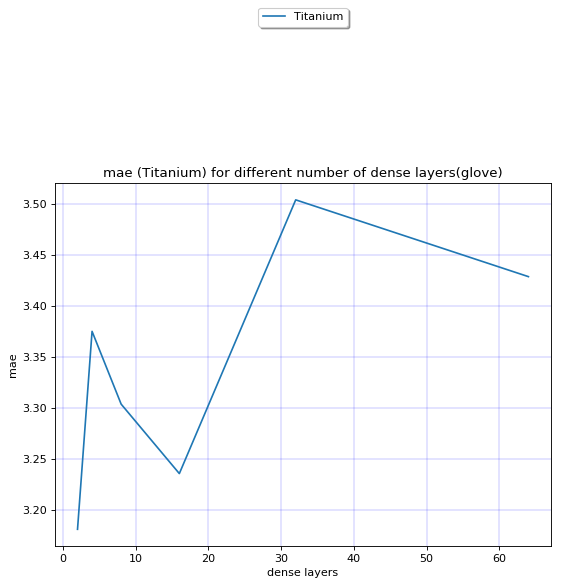

In [105]:
a=[3.181112,3.374966,3.303685,3.235685,3.50375,3.428546]

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
epochRange = [2,4,8,16,32,64]
plt.plot(epochRange,a)
plt.title('mae (Titanium) for different number of dense layers(glove)')
plt.ylabel('mae')
plt.xlabel('dense layers')
plt.legend(files, loc='upper center', bbox_to_anchor=(0.5,1.5),
          ncol=3, fancybox=True, shadow=True)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.show()

In [106]:
    %%time
    %%time
    import warnings
    warnings.filterwarnings('ignore')
    accuracy_glove=[]
## some config values 
    embed_size = 300 # how big is each word vector
    max_features = 1000 # how many unique words to use (i.e num rows in embedding vector)
    maxlen = 100 # max number of words in a question to use   
    
    df=pd.read_csv("/Users/shravan/Desktop/Thesis_final/Code/Dataset/titanium.csv",encoding='latin-1')

    def preprocess(sentence):
        sentence=str(sentence)
        sentence = sentence.lower()
        sentence=sentence.replace('{html}',"") 
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', sentence)
        rem_url=re.sub(r'http\S+', '',cleantext)
        rem_num = re.sub('[0-9]+', '', rem_url)
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(rem_num)  
        filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
        return " ".join(filtered_words)

    df['mergeText']=df['title'] .map(str)+str(" ")+df['description']
    df['cleanText']=df['mergeText'].map(lambda s:preprocess(s)) 
    print("titanium", 'preprocessing done')
     
    
    
    
    if max(df['storypoint'])>20:
        for i in range(0,len(df['storypoint']),1):
            if df['storypoint'][i]<=10 :
                df['storypoint'][i]='low'
            elif (df['storypoint'][i]<=20 and df['storypoint'][i] >10):
                df['storypoint'][i]='medium'
            else:
                df['storypoint'][i]='high'
                
    elif (max(df['storypoint'])>10 & max(df['storypoint'])<=20):
         for i in range(0,len(df['storypoint']),1):
            if df['storypoint'][i]<=5 :
                df['storypoint'][i]='low'
            elif (df['storypoint'][i]<=12 and df['storypoint'][i] > 5):
                df['storypoint'][i]='medium'
            else:
                df['storypoint'][i]='high'
    else:
         for i in range(0,len(df['storypoint']),1):
            if df['storypoint'][i]<=3 :
                df['storypoint'][i]='low'
            elif (df['storypoint'][i]<=5 and df['storypoint'][i] > 3):
                df['storypoint'][i]='medium'
            else:
                df['storypoint'][i]='high'
    one_hot = pd.get_dummies(df['storypoint'])
    print("Titanium","one_hot_encoding done ")
    # Drop column B as it is now encoded
    df = df.drop(['storypoint'],axis = 1)
    # Join the encoded df
    df = df.join(one_hot)  
    
    list_classes = ['low','medium','high']
    y = df[list_classes].values
    
    #---------train_test_split---------#
     ## Get the target values
    X = df["cleanText"].fillna("_na_").values
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3)


    ## Tokenize the sentences
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))
    train_X = tokenizer.texts_to_sequences(train_X)
    val_X = tokenizer.texts_to_sequences(val_X)

    ## Pad the sentences 
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = pad_sequences(val_X, maxlen=maxlen)
    
    #Load glove embedding file
    EMBEDDING_FILE = '/Users/shravan/Desktop/Thesis_final/Code/glove.840B.300d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    
    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]


    word_index = tokenizer.word_index
    nb_words = min(max_features, len(word_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: embedding_matrix[i] = embedding_vector
    
    print('Titanium', 'embedding done')
  
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(GRU(64, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(3, activation="sigmoid")(x) 
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    batch_size = 32
    epochs = 4
    hist = model.fit(train_X,train_y, batch_size=batch_size, epochs=epochs, validation_split=0.3) 
    ## Train the model 
    print("Titanium", 'training done')
    y_pred = model.predict(pd.DataFrame(val_X))# predicting model on test data and store
    print("Titanium", 'prediction done')
    

titanium preprocessing done
Titanium one_hot_encoding done 
Titanium embedding done
Train on 1102 samples, validate on 473 samples
Epoch 1/4
1102/1102 [==============================] - 9s 8ms/step - loss: 0.4866 - acc: 0.8261 - val_loss: 0.3513 - val_acc: 0.8971
Epoch 2/4
1102/1102 [==============================] - 4s 4ms/step - loss: 0.3021 - acc: 0.9056 - val_loss: 0.3032 - val_acc: 0.8971
Epoch 3/4
1102/1102 [==============================] - 4s 4ms/step - loss: 0.2865 - acc: 0.9056 - val_loss: 0.2907 - val_acc: 0.8971
Epoch 4/4
1102/1102 [==============================] - 4s 4ms/step - loss: 0.2545 - acc: 0.9056 - val_loss: 0.2851 - val_acc: 0.8971
Titanium training done
Titanium prediction done
CPU times: user 5min 1s, sys: 52.6 s, total: 5min 54s
Wall time: 5min 5s
CPU times: user 5min 1s, sys: 52.6 s, total: 5min 54s
Wall time: 5min 6s


In [108]:
accuracy_glove.append(hist.history['val_acc'][3])

In [109]:
accuracy_glove

[0.897110633189784]